In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as Wait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import re

In [2]:
driver = webdriver.Chrome("C:/selenium/chromedriver")
driver.implicitly_wait(1)
driver.maximize_window()
driver.implicitly_wait(1)

In [3]:
driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&ogbl")

keyword = "car"

im_search_blank = Wait(driver, 5).until(
                ec.presence_of_element_located((By.XPATH, '//*[@id="sbtc"]/div/div[2]/input')))
im_search_blank.send_keys(keyword)
im_search_blank.send_keys(Keys.ENTER)

for _ in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)
    
more_images_bt =  Wait(driver, 5).until(
    ec.presence_of_element_located((By.XPATH, '//*[@id="islmp"]/div/div/div/div/div[5]/input')))
more_images_bt.click()

for _ in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)

In [4]:
image_show_bts = Wait(driver, 5).until(
                ec.presence_of_all_elements_located((By.CSS_SELECTOR, 'div.BUooTd')))

In [5]:
len(image_show_bts)

745

In [273]:
driver.switch_to.window(driver.window_handles[0])

In [ ]:
image_url_li = []

count = 1
for image_show_bt in image_show_bts[0:]:
    image_show_bt.click()
    try:      
        image_show_url = Wait(driver, 1).until(
            ec.presence_of_element_located((By.XPATH, '//*[@id="islrg"]/div[1]/div[' + str(count) + ']/a[1]')))
    except:
        count += 1
        image_show_url = Wait(driver, 1).until(
            ec.presence_of_element_located((By.XPATH, '//*[@id="islrg"]/div[1]/div[' + str(count) + ']/a[1]')))
    finally:
        image_show_url = image_show_url.get_attribute("href")
        

    # 새 탭에서 해당 이미지 검색결과만 나온 url을 들어감
    driver.execute_script("window.open('');")
    driver.switch_to.window(driver.window_handles[1])
    
    driver.get(image_show_url)
    time.sleep(0.5)

    while True:
        page_source = driver.page_source
        re_object = re.search('<img class=\"irc_mut\" data-atf=\"0\" src=\"', page_source)

        if re_object is not None:
            image_url = page_source[re_object.end():]
            image_url = image_url[:re.search('\"', image_url).start()]
            image_url_li.append(image_url)
            break
        else:
            time.sleep(0.5)

    driver.close()
    driver.switch_to.window(driver.window_handles[0])
    
    print(count, end= " ")
    count += 1

In [263]:
page_source = driver.page_source
re_object = re.search('<img class=\"irc_mut\" data-atf=\"0\" src=\"', page_source)
re_object

In [ ]:
image_url_li = []
for count, image_show_bt in enumerate(image_show_bts):
    image_show_bt.click()
    image_show_url = Wait(driver, 5).until(
        ec.presence_of_element_located((By.XPATH, '//*[@id="islrg"]/div[1]/div[' + str(count + 1) + ']/a[1]')))
    image_show_url = image_show_url.get_attribute("href")

    # 새 탭에서 해당 이미지 검색결과만 나온 url을 들어감
    driver.execute_script("window.open('');")
    driver.switch_to.window(driver.window_handles[1])
    
    driver.get(image_show_url)
    driver.implicitly_wait(0.2)
    
    while True:
        image_url = Wait(driver, 3).until(
                        ec.presence_of_element_located((By.XPATH, '//*[@id="irc_cc"]/div/div[2]/div[1]/div[2]/div[2]/a/img')))
        image_url = image_url.get_attribute("src") 
        
        if image_url is not None:
            image_url_li.append(image_url)
            break
        else:
            time.sleep(0.1)
            
    driver.close()
    driver.switch_to.window(driver.window_handles[0])
    
    print(count, end= " ")

In [254]:
driver.close()

In [ ]:
image_url_li

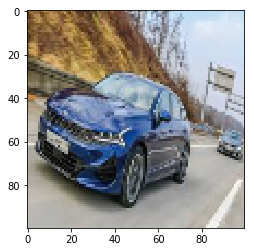

In [6]:
import requests
import skimage.io
import skimage
from io import BytesIO

# response = requests.get(image_url_li[24])


# image = skimage.io.imread(BytesIO(response.content))
image = skimage.io.imread("car.jpg")

new_image = skimage.transform.resize(image, (100, 100))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(new_image) 
plt.show()

In [90]:
skimage.io.imsave("C:/Users/User/Desktop/blue" + "6" + ".png", new_image)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/User/Desktop/blue6.png is a low contrast image
  warn('%s is a low contrast image' % fname)


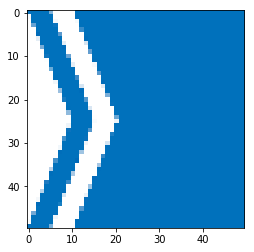

In [33]:
driver.close()

In [6]:
li = ["a", "b", "c", "d", "e"]
indices = list(range(len(li)))

import random

random.shuffle(indices)
li = [li[i] for i in indices]
print(li)

['e', 'b', 'c', 'd', 'a']


In [12]:
li = [li[i] for i in indices]
print(li)

['a', 'b', 'c', 'd', 'e']
